In [1]:
library(tidyverse)
library(janeaustenr)
library(tidytext)
library(wordcloud2)
library(readxl)
library(fastDummies)
library(reshape2)

devtools::install_github("kassambara/factoextra") #packages to cluster
devtools::install_github("qinwf/jiebaR")  #packages to cut the words
library(factoextra)
library(jiebaR)

spotify<-read_excel("../input/spotify-top-100-songs-of-20152019/Spotify 2010 - 2019 Top 100 Songs.xlsx")
options(repr.plot.width=10, repr.plot.height = 10, repr.plot.res = 150)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths





testthat   (3.1.3 -> 3.1.4 ) [CRAN]
xfun       (0.30  -> 0.31  ) [CRAN]
knitr      (1.38  -> 1.39  ) [CRAN]
nloptr     (NA    -> 2.0.2 ) [CRAN]
lme4       (NA    -> 1.1-29) [CRAN]
quantreg   (5.88  -> 5.93  ) [CRAN]
pbkrtest   (NA    -> 0.5.1 ) [CRAN]
ggplot2    (3.3.5 -> 3.3.6 ) [CRAN]
car        (NA    -> 3.0-13) [CRAN]
dplyr      (1.0.8 -> 1.0.9 ) [CRAN]
tibble     (3.1.6 -> 3.1.7 ) [CRAN]
rstatix    (NA    -> 0.7.0 ) [CRAN]
flashClust (NA    -> 1.01-2) [CRAN]
DT         (0.22  -> 0.23  ) [CRAN]
ggpubr     (NA    -> 0.4.0 ) [CRAN]
FactoMineR (NA    -> 2.4   ) [CRAN]


Installing 16 packages: testthat, xfun, knitr, nloptr, lme4, quantreg, pbkrtest, ggplot2, car, dplyr, tibble, rstatix, flashClust, DT, ggpubr, FactoMineR

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘dplyr’ had non-zero exit status”


✔  checking for file ‘/tmp/Rtmp2muCxf/remotese268f72e9/kassambara-factoextra-1689fc7/DESCRIPTION’
─  preparing ‘factoextra’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘factoextra_1.0.7.999.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




jiebaRD (NA -> 0.1) [CRAN]


Installing 1 packages: jiebaRD

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp2muCxf/remotese1e380bfa/qinwf-jiebaR-a984fb8/DESCRIPTION’
─  preparing ‘jiebaR’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘jiebaR/.github’
─  building ‘jiebaR_0.11.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: jiebaRD



> ## **1. Relationship between each genres**

#### **Normalize each variables**

In [2]:
genre<-spotify[,c(3,6:17)]

regulation<-function(x){
  return( (x - min(x,na.rm = T))/( max(x, na.rm = T) - min(x, na.rm = T)) )
}

for(i in 2:12){
  genre[,i] = regulation(genre[,i])
}

genre2<-genre[,13]%>%dummy_cols(remove_selected_columns = T)
genre<-genre[,-13]%>%cbind(genre2)

#### **Relationship between music features**

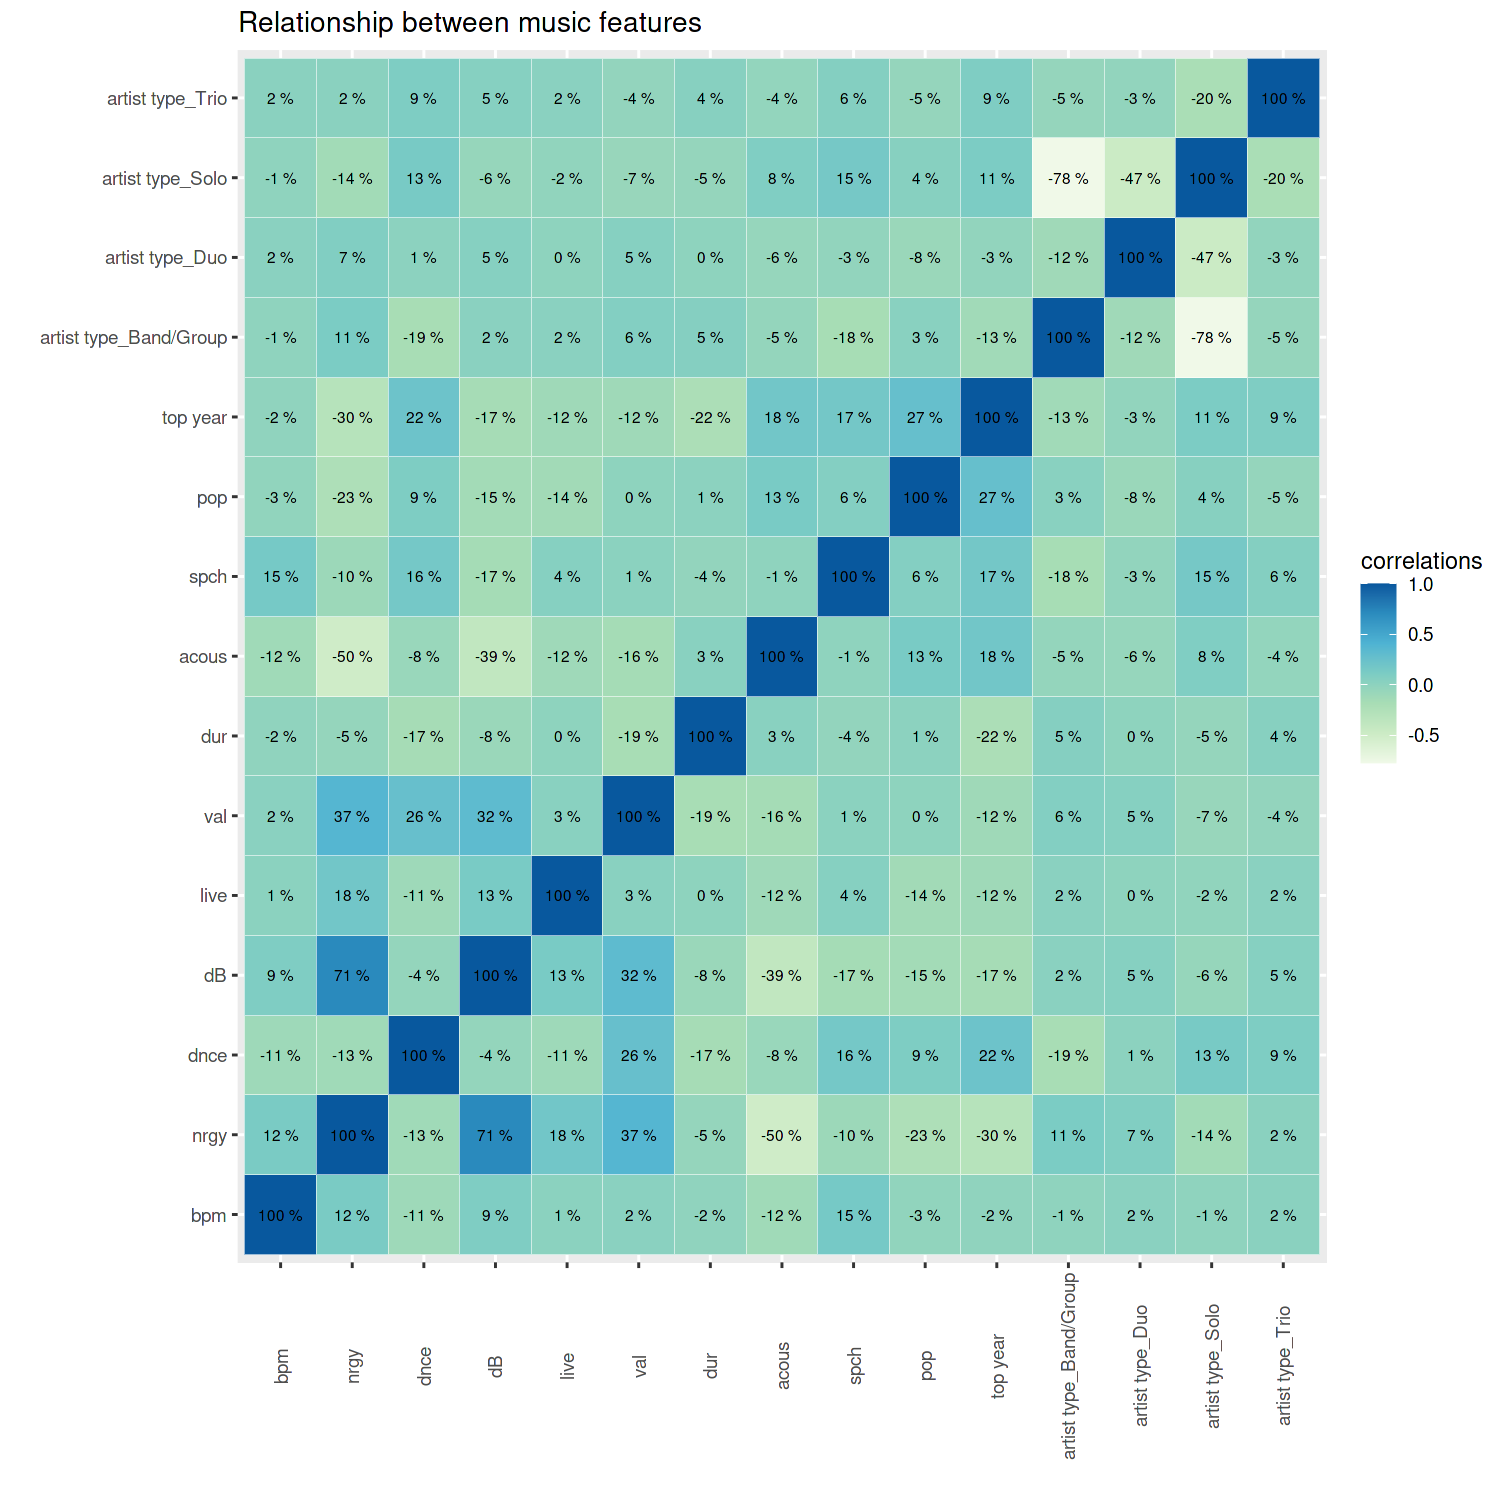

In [3]:
genre[,c(2:16)]%>%
  cor()%>%
  melt()%>%
  ggplot(aes(Var1, Var2, fill=value))+
  geom_tile(color='white')+
  scale_fill_distiller(palette = 'GnBu', direction = 1)+
  geom_text(aes(label=paste(round(value,2)*100,'%')), size=2.5, color='black')+
  labs(x='',y='',fill='correlations', title='Relationship between music features')+
  theme(axis.text.x = element_text(angle = 90, vjust = .5))

#### Correlation：
1. Decibel(How loud the song is), Energy are highly correlated
2. Energy, Val(How positive the mood of the song is) are seldom correlated
3. Acoustic(How acoustic the song is) is largely negatively correlated to Energy, Decibel



#### Highly correlated with **Top year**：
1. Danceability
2. Acoustic
3. Popular
4. Solo

> It can inferred that more **Danceability**, **Acoustic**, and more **Popular** the song, artistic type is **Solo** and **Trio** are the top hit in recent year,
> Also, the Duration of the song and the Energy of the song, and aristic type is band are the top hit in past year.

> ## **2. Top Artist in each year**

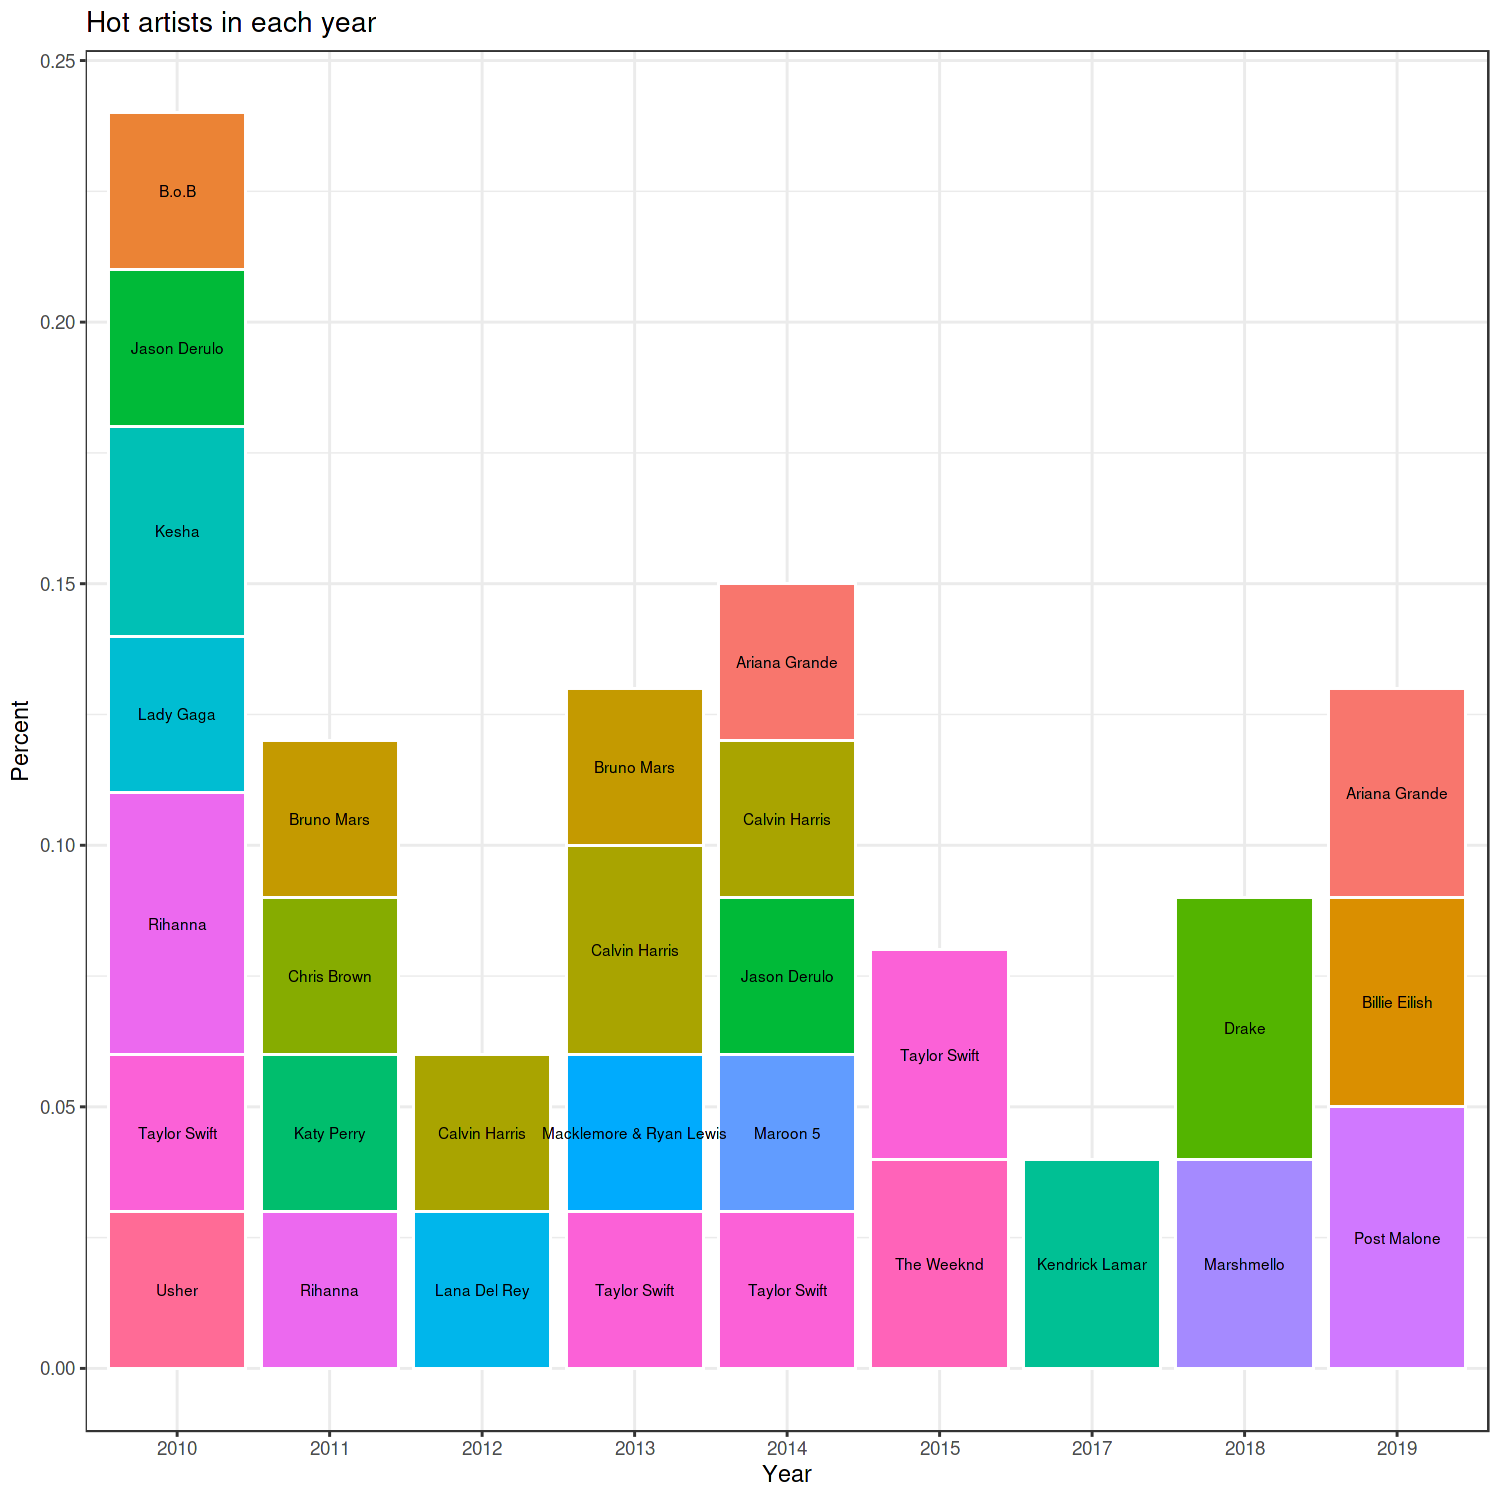

In [4]:
top_artist<-spotify%>%
  group_by(`top year`)%>%
  count(artist)%>%
  mutate(prop=n/sum(n))

top_artist[order(top_artist$n, decreasing=TRUE)[1:30], ]%>%
  ggplot(aes(as_factor(`top year`), prop, fill=artist))+
  geom_bar(stat='identity',  color = 'white', show.legend = F)+
  geom_text(aes(label=paste(artist)), size=2.5, color='black',
            position = position_stack(vjust = .5))+
  theme_bw()+
  labs(title='Hot artists in each year', y='Percent', x='Year')

> **Ariana Grande**, **Post Malone**, **Billie Eilish** are the top singer in recent year

> ## **3. Top genre in each year**

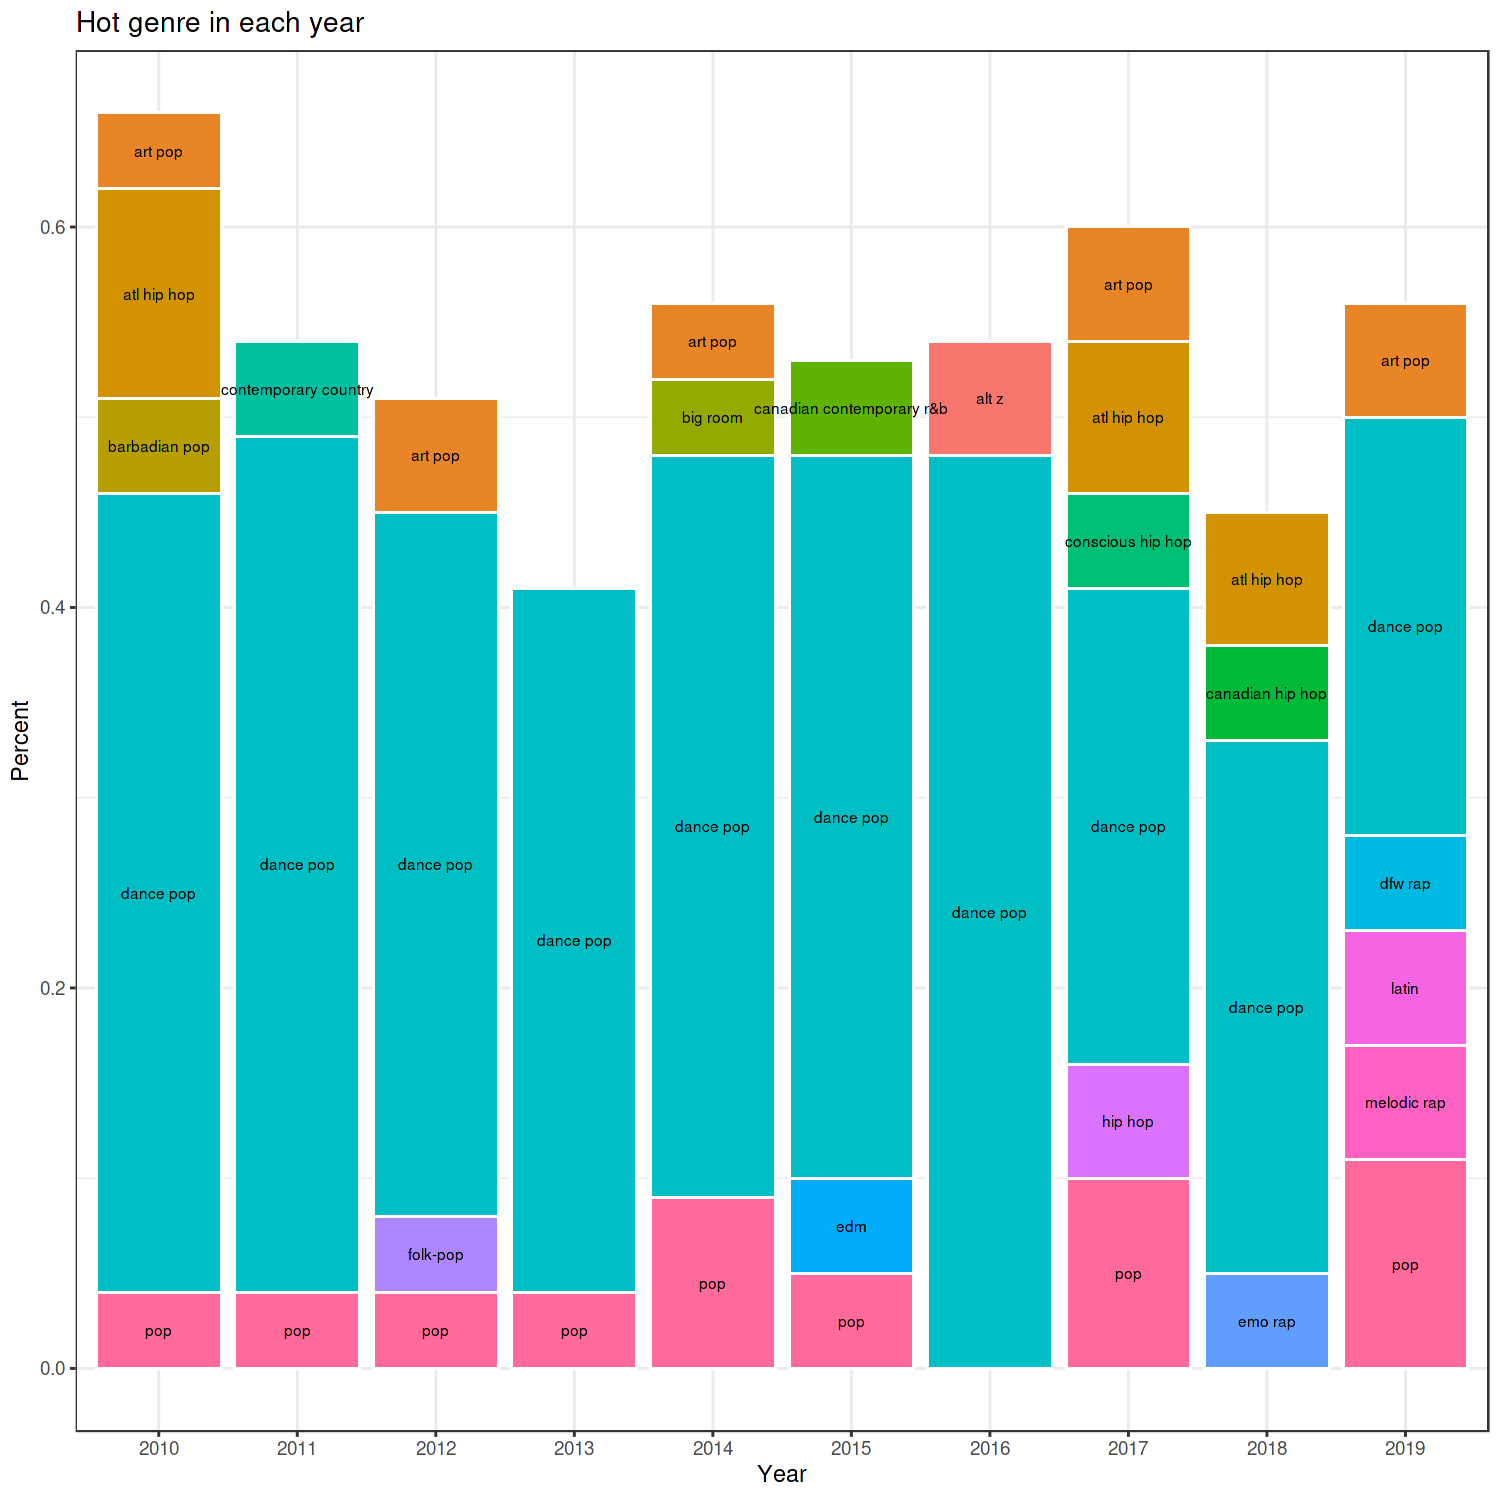

In [5]:
top_genre<-spotify%>%
  group_by(`top year`)%>%
  count(`top genre`)%>%
  mutate(prop=n/sum(n))

top_genre[order(top_genre$n, decreasing=TRUE)[1:40], ]%>%
  ggplot(aes(as_factor(`top year`), prop, fill=`top genre` ))+
  geom_bar(stat='identity',  color = 'white', show.legend = F)+
  geom_text(aes(label=paste(`top genre` )), size=2.5, color='black',
            position = position_stack(vjust = .5))+
  theme_bw()+
  labs(title='Hot genre in each year', y='Percent', x='Year')

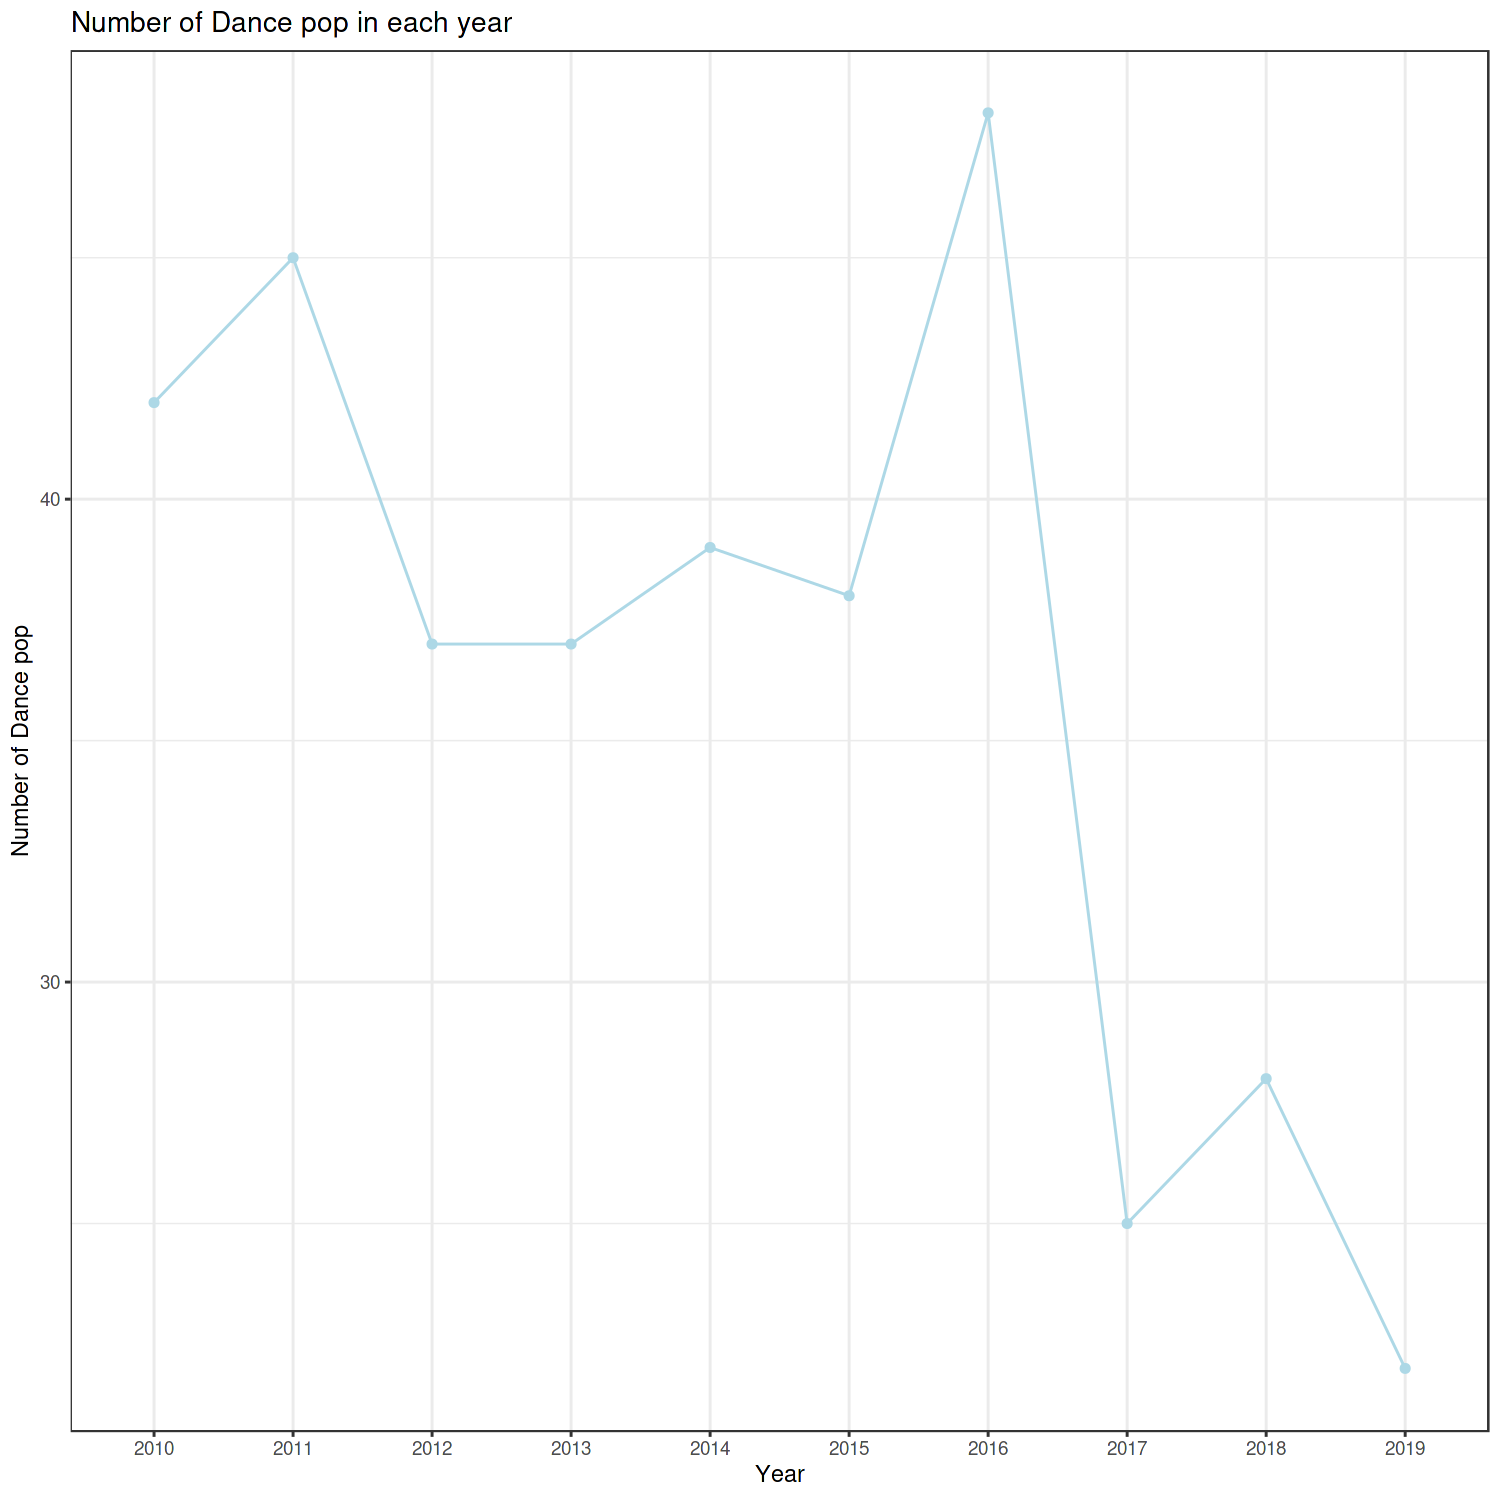

In [6]:
spotify%>%
  group_by(`top year`)%>%
  count(`top genre`)%>%
  filter(`top genre` == 'dance pop')%>%
  ggplot(aes(as_factor(`top year`), n))+
  geom_point(color='lightblue')+
  geom_line(group=1, color='lightblue')+
  theme_bw()+
  labs(title='Number of Dance pop in each year', y='Number of Dance pop', x='Year')


> 1. **Dance pop** is the most genres in every year, but the proportion is decreasing in recent year
> 2. **Latin, metro rap, rap** are popular in recent year

> ## **4. Predict the top song in future year**

#### **1. Segment different type of songs**
- Find optimal number of cluster by using kmeans and hclust

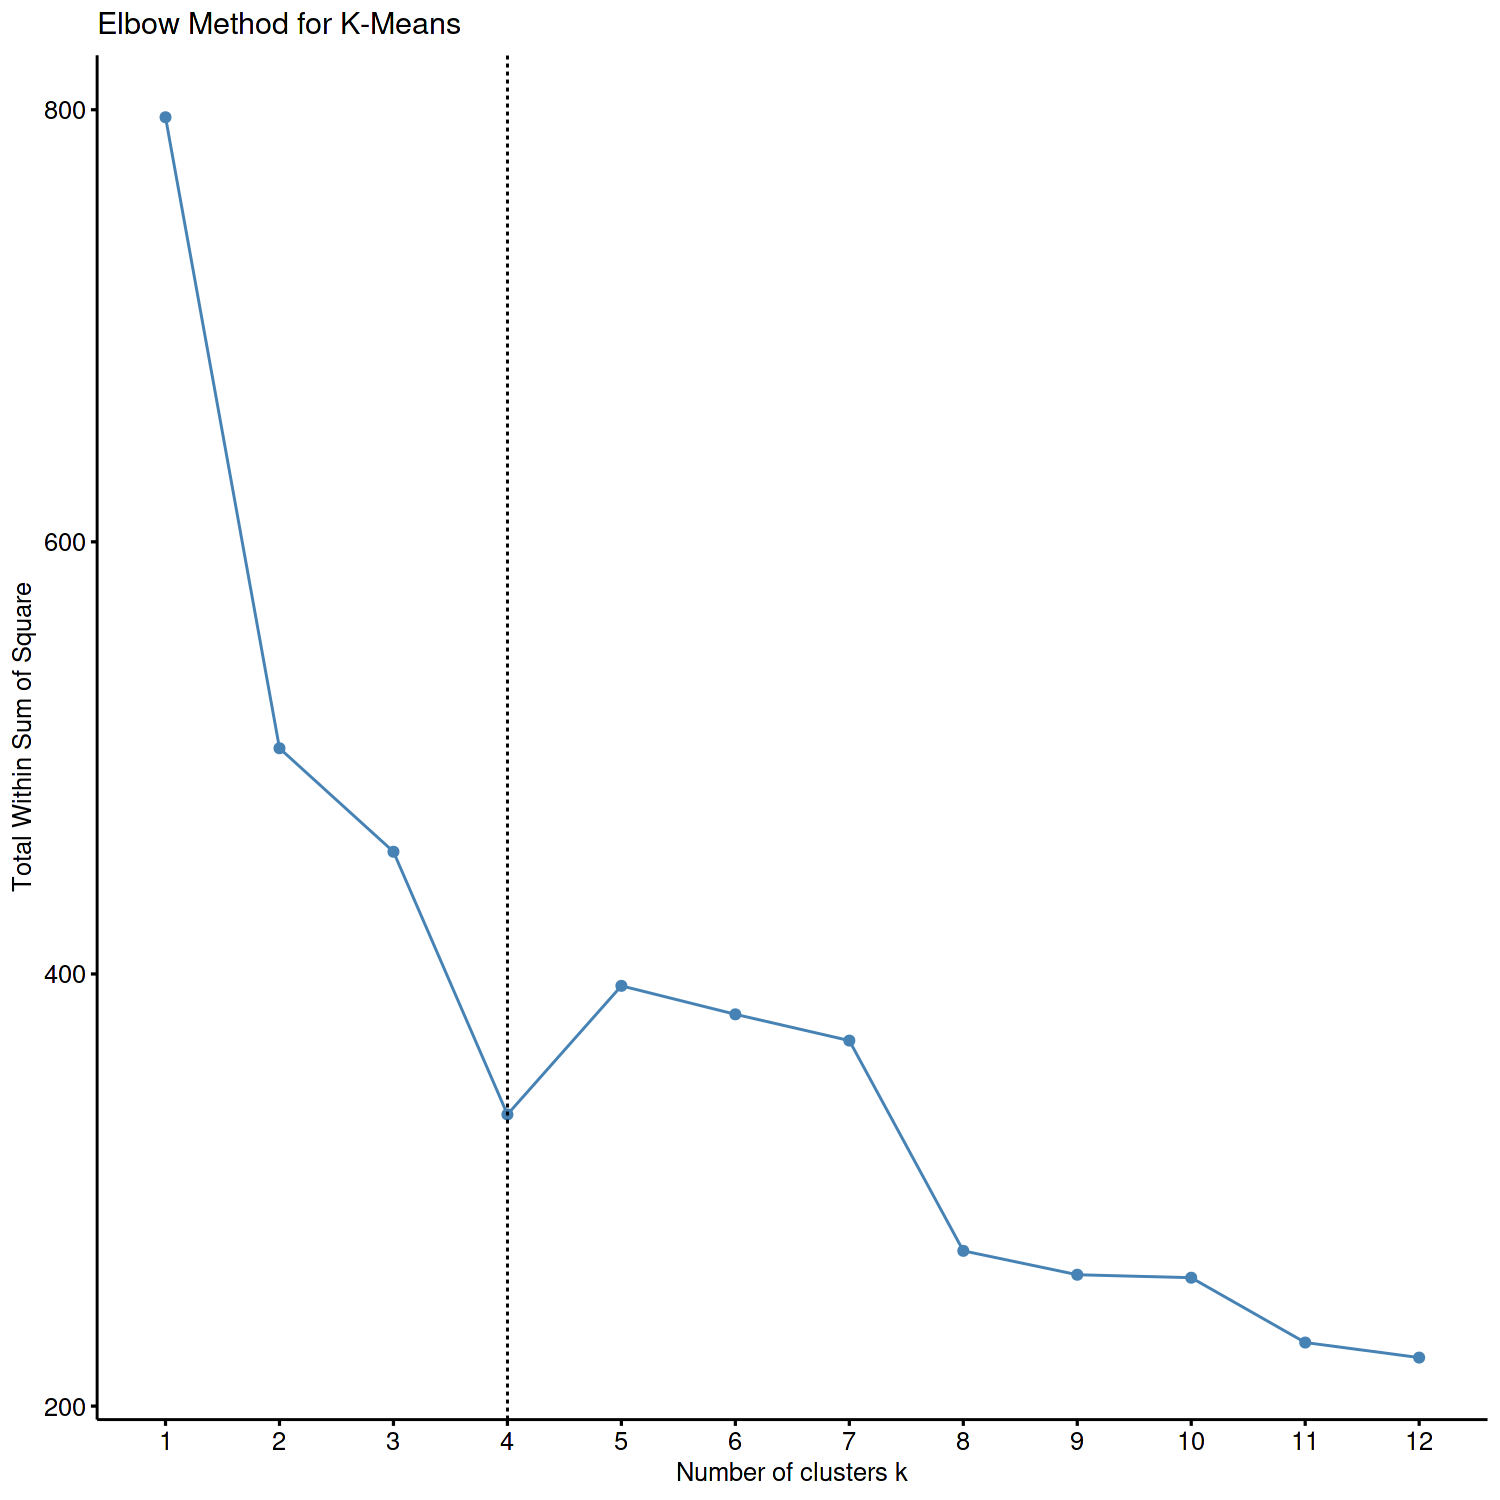

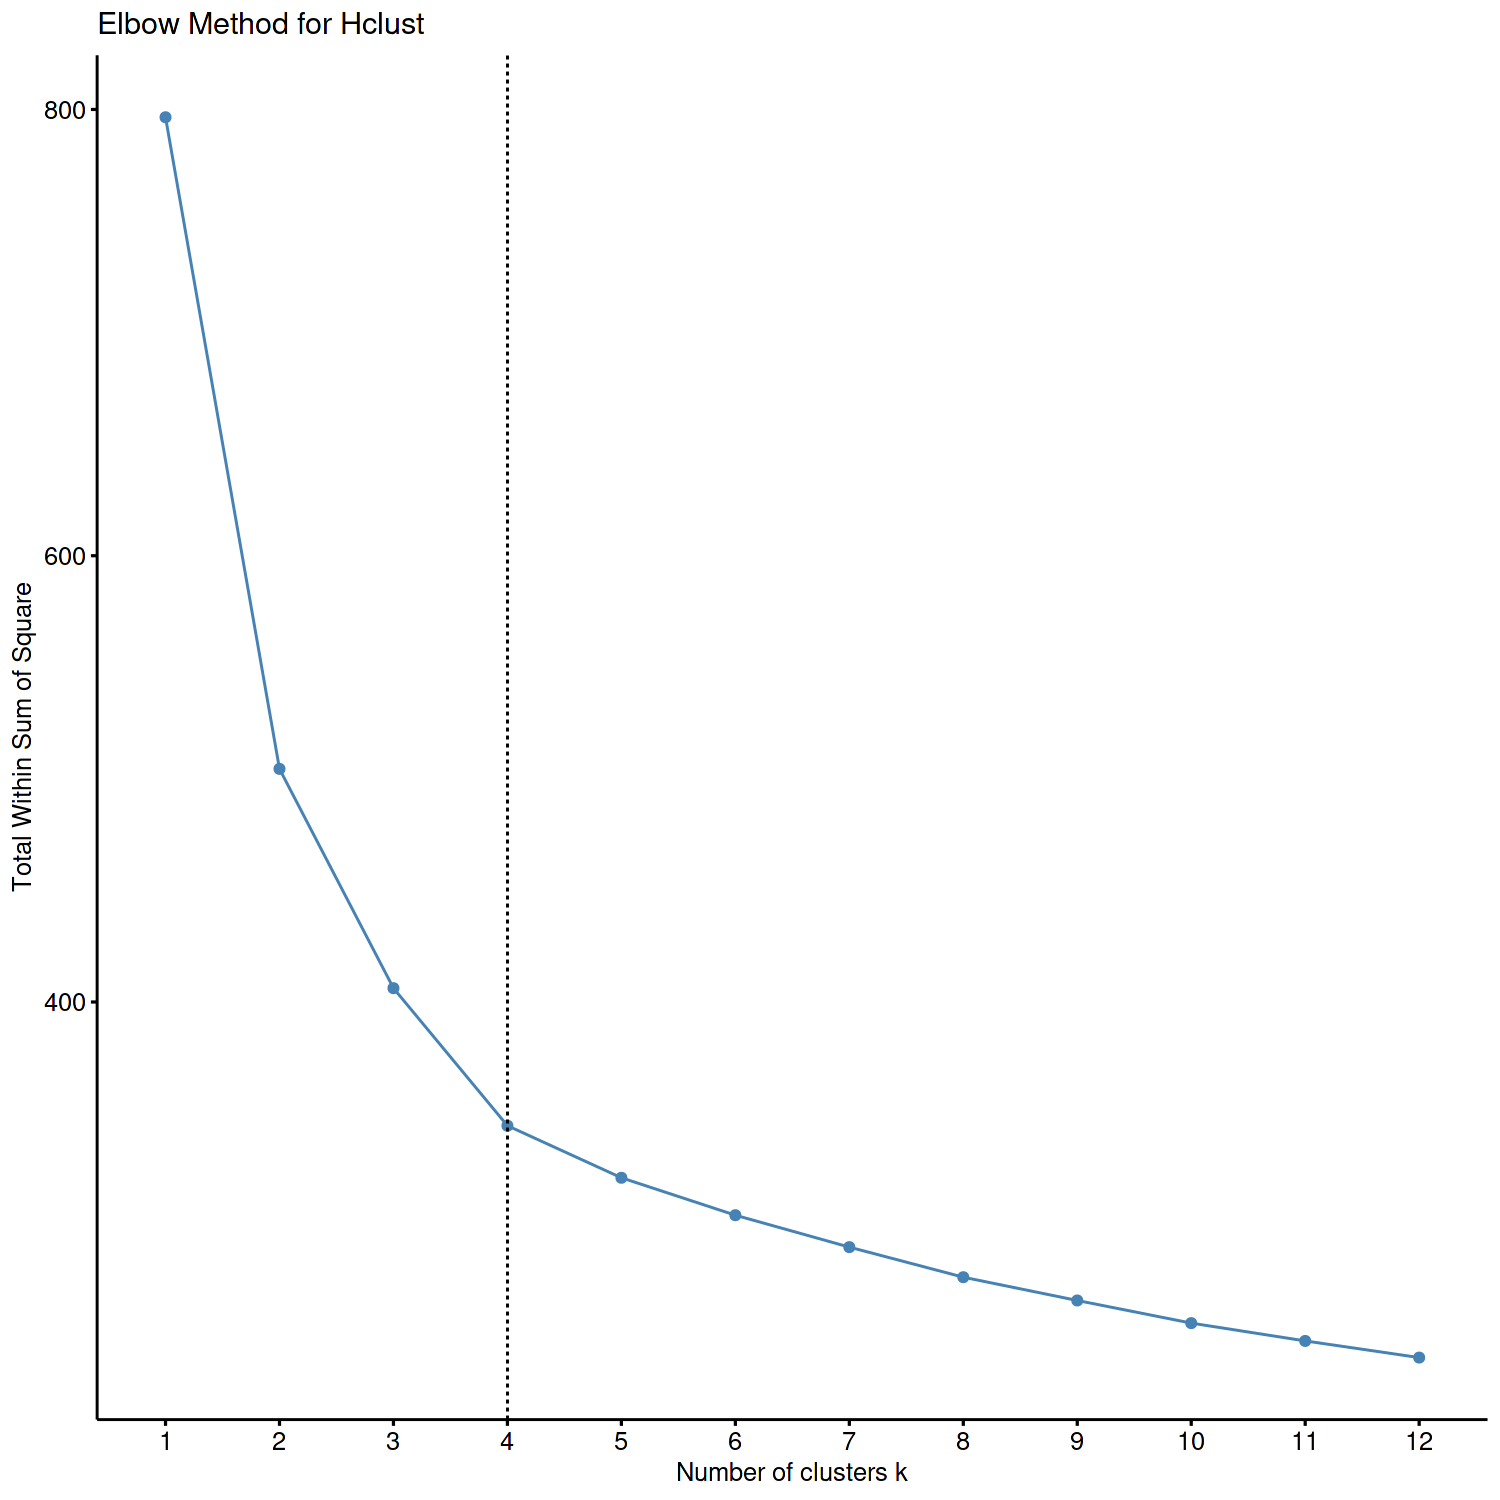

In [7]:
set.seed(10)
fviz_nbclust(genre[,c(2:16)], 
             FUNcluster = kmeans,
             method = "wss",
             k.max = 12)+
  labs(title="Elbow Method for K-Means") +
  geom_vline(xintercept = 4,
             linetype = 2)

fviz_nbclust(genre[,c(2:16)], 
             FUNcluster = hcut,
             method = "wss",
             k.max = 12)+
  labs(title="Elbow Method for Hclust") +
  geom_vline(xintercept = 4,
             linetype = 2)

 #### K-means and Hclust result: **4 clusters** is the optimal number

In [8]:
cluster<-kmeans(genre[,c(2:16)], 4)
spotify<-spotify%>%
  mutate(group=cluster$cluster)
spotify$group<-as_factor(spotify$group)

#### **2. Different group vs Artist Type**

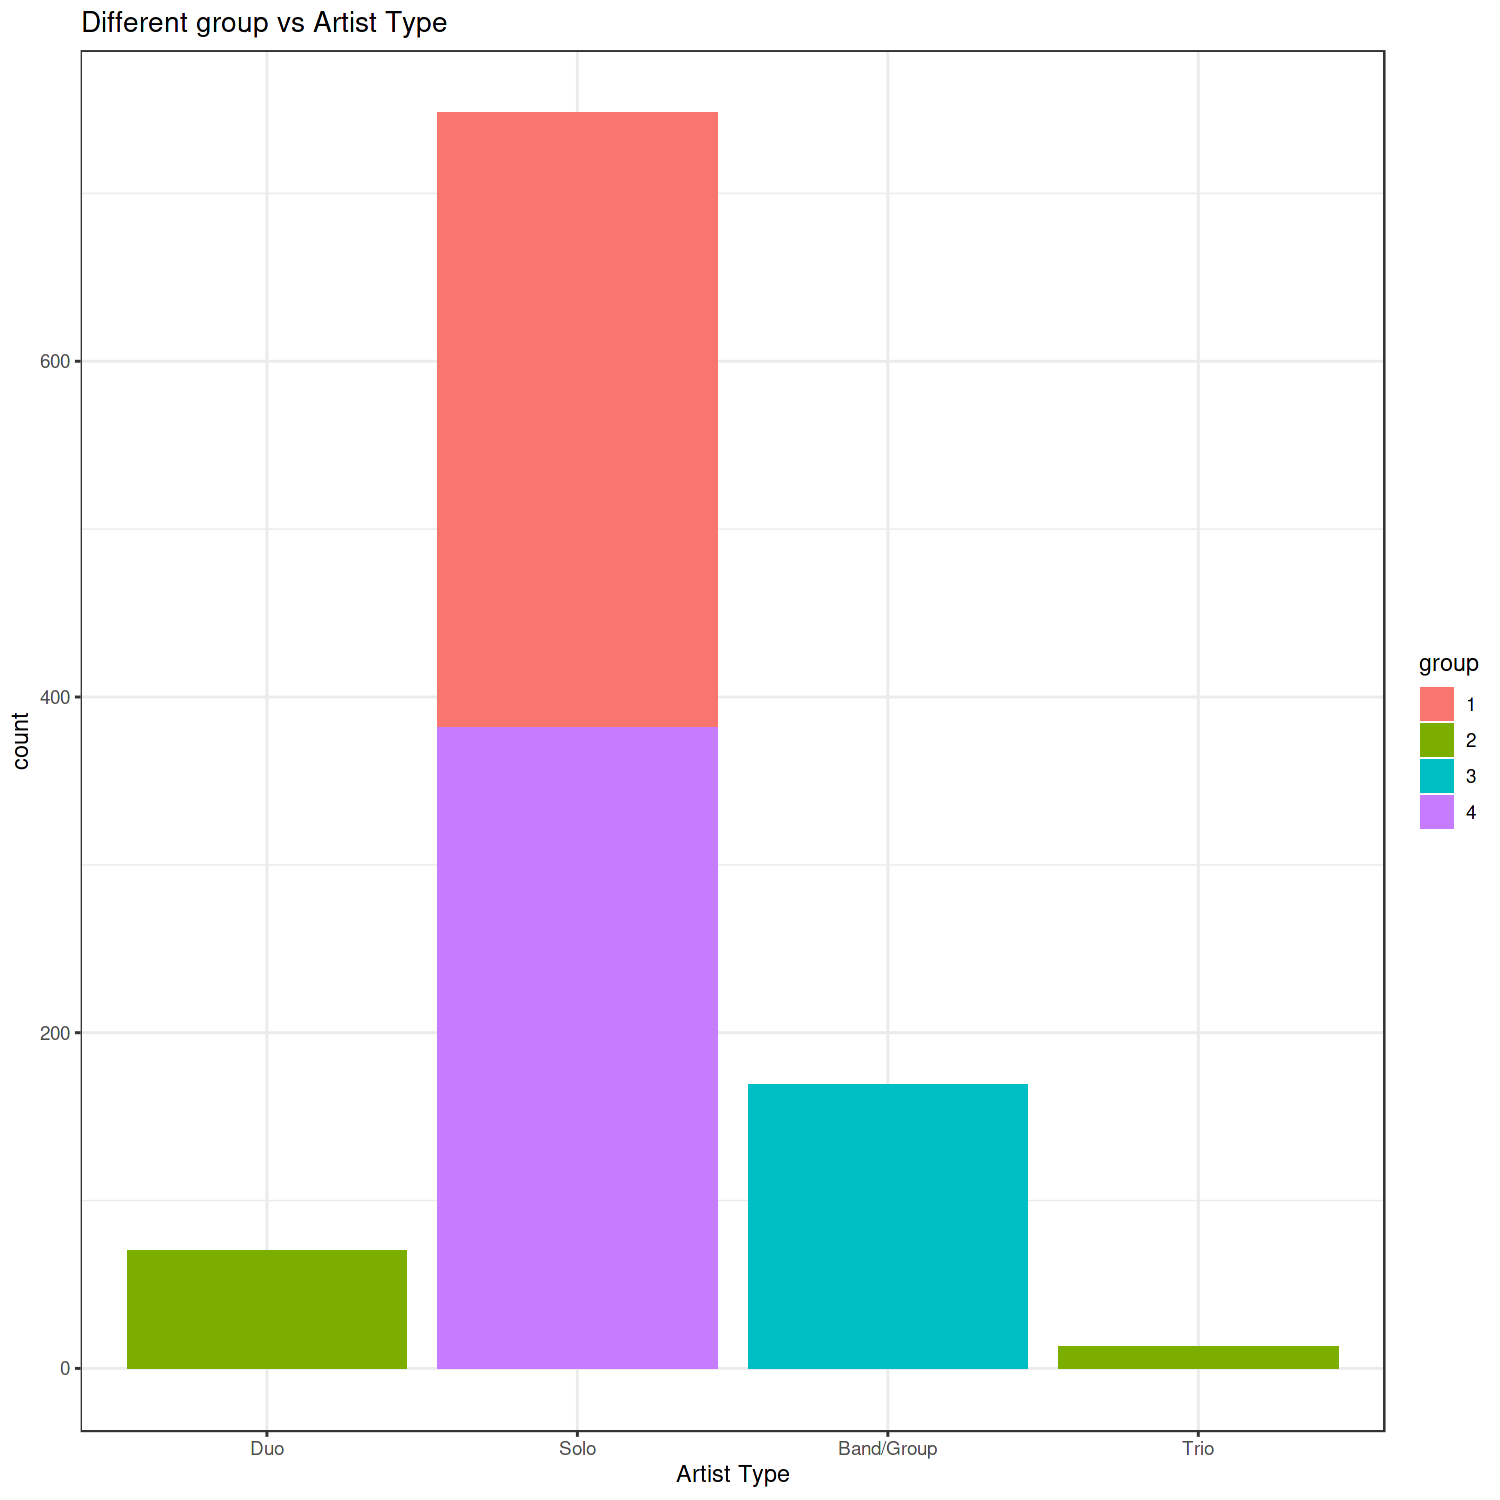

In [9]:
spotify%>%
  ggplot(aes(as_factor(`artist type`)))+
  geom_bar(aes(fill=group))+
  labs(title='Different group vs Artist Type', fill='group', x='Artist Type')+
  theme_bw()

#### **3. Correlation of variables in Different group**

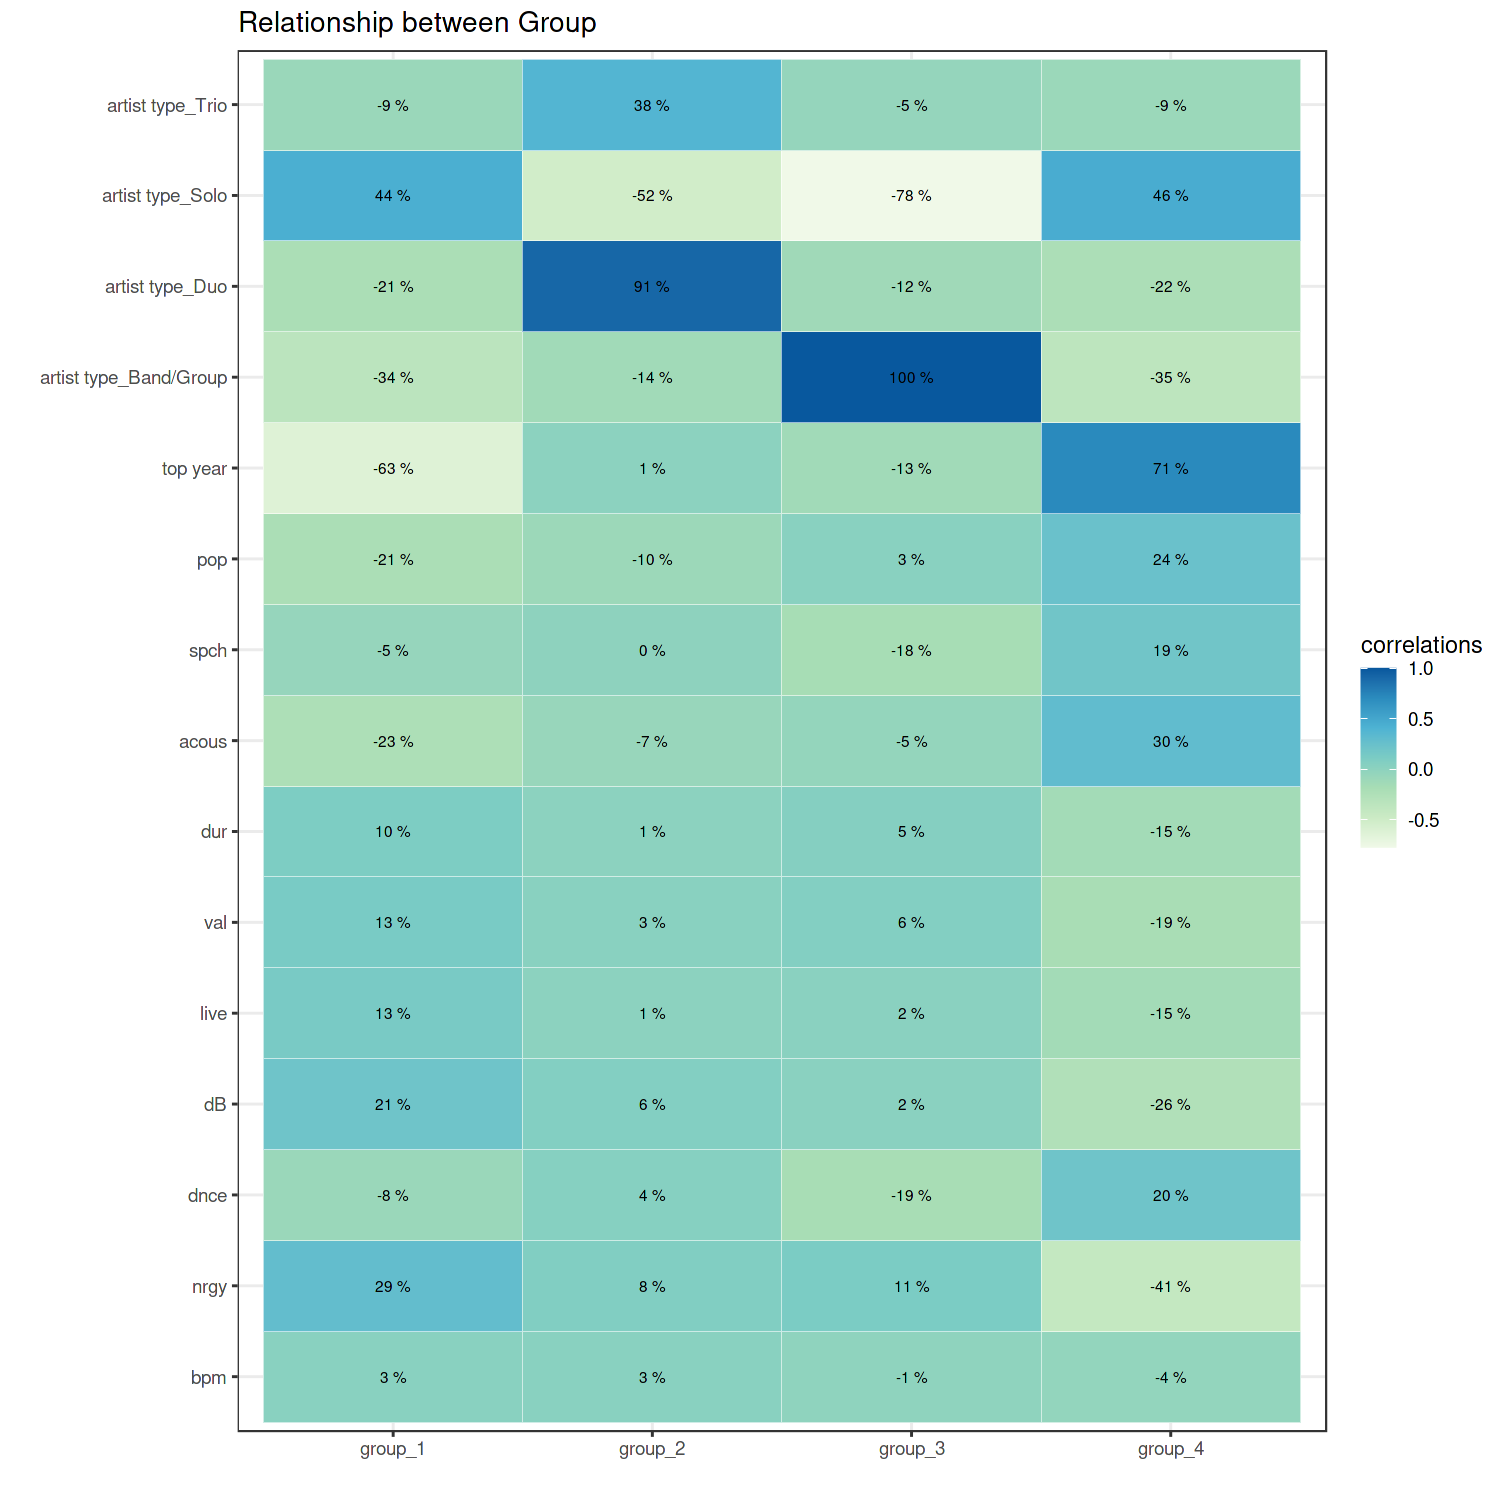

In [10]:
group<-spotify[,18]%>%dummy_cols(remove_selected_columns = T)
genre3<-genre%>%cbind(group)
genre3[,c(2:20)]%>%
  cor()%>%
  melt()%>%
  filter(str_detect(Var1, 'group') & !str_detect(Var2, 'group'))%>%
  ggplot(aes(Var1, Var2, fill=value))+
  geom_tile(color='white')+
  scale_fill_distiller(palette = 'GnBu', direction = 1)+
  geom_text(aes(label=paste(round(value,2)*100,'%')), size=2.5, color='black')+
  labs(x='',y='',fill='correlations', title='Relationship between Group')+
  theme_bw()

> 1. Group 4 is highly correlated with **top year**, which are **Danceability**, **popular**, the more the song is focused on **spoken word, Solo**
> 2. Group 3 is seldom correlated with **top year**, which are **Acoustic**, **Solo**
##### Group 4 is the top song in future year

#### **Group 4: Number of hot songs in spotify**

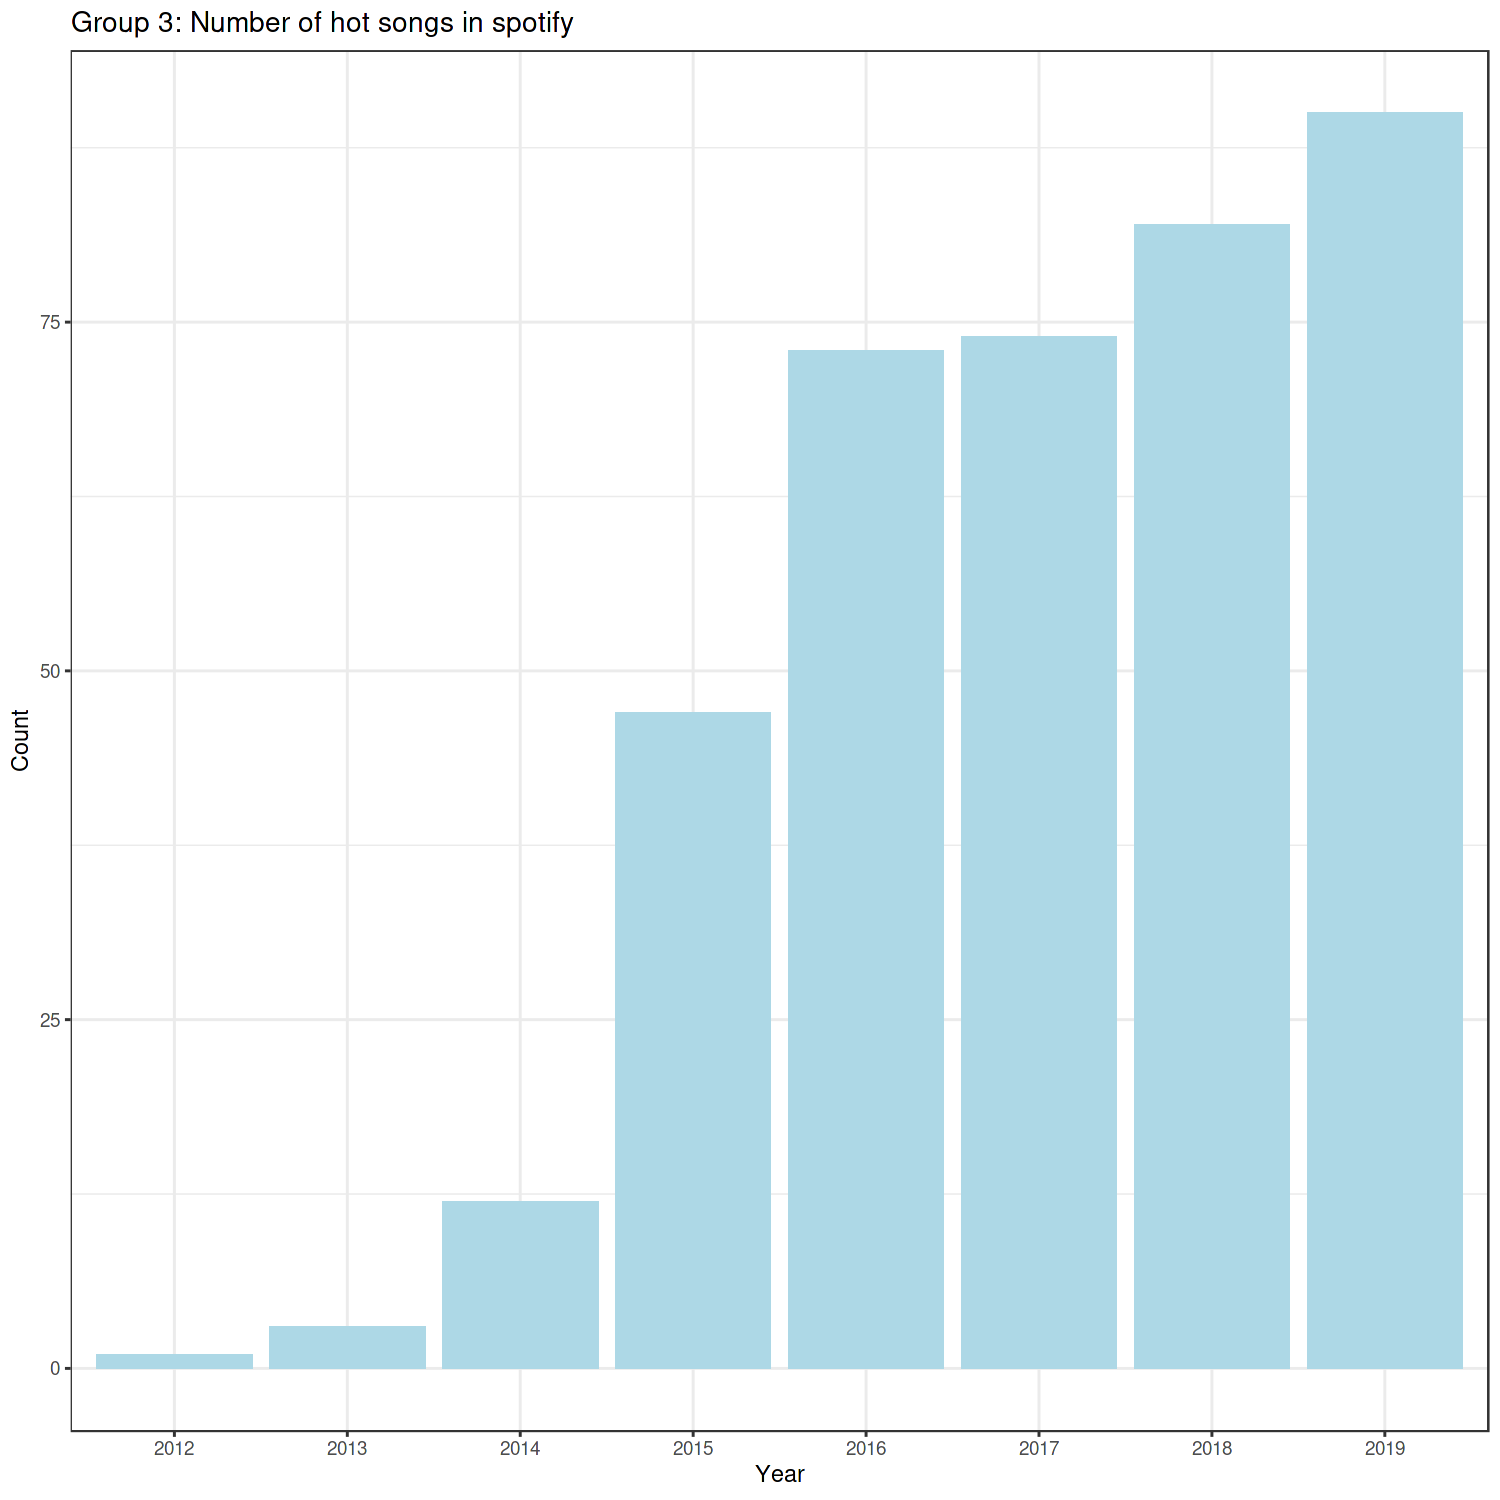

In [11]:
spotify%>%
  filter(group==4)%>%
  ggplot(aes(as_factor(`top year`)))+
  geom_bar(fill='lightblue')+
  labs(x='Year',y='Count', title='Group 3: Number of hot songs in spotify')+
  theme_bw()

#### **Group 4: Song title**
- Most are **'feat', 'You'**
- It can inferred that **cooperation in dance pop of solo singer** is popular in recent year

In [12]:
cut<-worker()

group4<-spotify%>%
  filter(group==4)%>%
  select(title)

tibble(title=segment(group4$title, cut))%>%
  count(title)%>%
  wordcloud2()

HTML widgets cannot be represented in plain text (need html)

#### **Group 4: Who is popular cooperation prater?**

In [13]:
name<-c('feat.+', 'with.+')

featSinger<-str_extract(group4$title, paste(name, sep='|'))
featSinger<-tibble(singer = featSinger)%>%
  filter(!is.na(singer))

featSinger<-str_remove(featSinger$singer, 'feat. ')
featSinger<-str_remove(featSinger, 'with ')
featSinger<-str_remove(featSinger, '\\)')

tibble(singer = featSinger)%>%
  count(singer)%>%
  arrange(desc(n))

singer,n
<chr>,<int>
Drake,3
G-Eazy,2
Khalid,2
Travis Scott,2
Ty Dolla $ign,2
"2 Chainz, Big Sean, Nicki Minaj",1
21 Savage,1
Blueface [Remix],1
Bruno Mars,1


**Hot feat singer:**
1. Drake
2. J. Davi$ & Spooks
3. Travis Scott   

[](http://media1.popsugar-assets.com/files/thumbor/zan-t_Me63if8oqWYE9ENiPLlhA/0x224:2826x3050/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2020/02/11/894/n/1922398/87f6bb525e430e7bd44e40.22278576_/i/Drake.jpg)